In [2]:
# This code is to classify the data by foodgroup and then predict price given a model for that specific food group. 

The implementation has been successful. The first step, to classify the data was done with random forest classification. It was found that due to the small size of the data set, it was difficult to test the output of the model without a small training set. Therefore this was adjusted to 50:50 test to train. 
Once this was completed, the classifier worked well and produced good results, incorrectly classifying a small number of products. 

The second step, to build a regression model for individual products was sucessful, but again limited data made it challenging. It was shown to be better for some products than others, but crucially it prediced better than the model trained on all data. However, only the food groups with greatest number of products were tested and so it may become challenging for smaller food groups. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [4]:
nutrition = pd.read_pickle("./Nutrition_Full_Features.pkl")
#nutrition.drop(nutrition.columns[[]], axis=1, inplace=True) 

# removing the brand, and food type columns for data cleaning. 
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,NaN,NaN,NaN,4864.0,1615.0,NaN,NaN,NaN,NaN,NaN
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,NaN,NaN,NaN,5195.0,2240.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [5]:
nutrition = nutrition.dropna() # dropping NaN values. This ensures random forests can accept data. 
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# checking types of data
#nutrition.dtypes 

In [7]:
X = nutrition.iloc[:, 11:].astype('float64').dropna() 
# pulling out the features data
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,273.0,9.22,6.58,41.05,4.30,2.2,1.898,279.0,6.04,126.0,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,309.0,9.49,7.42,48.39,4.41,2.6,2.275,299.0,6.59,138.0,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,290.0,11.50,2.17,44.54,22.02,1.6,2.313,14.0,0.91,76.0,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,238.0,2.15,10.66,43.91,5.00,9.2,0.630,684.0,4.89,127.0,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,250.0,1.53,10.20,48.89,6.12,4.1,0.000,20.0,2.76,165.0,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241.0,10.16,1.66,40.60,19.10,2.9,1.507,4.0,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19.0,0.27,1.39,3.78,0.71,3.1,0.053,62.0,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96.0,6.84,5.23,4.32,1.89,1.2,1.486,70.0,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208.0,15.70,1.22,17.17,11.23,2.3,2.452,30.0,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [8]:
y = nutrition.iloc[:, 1:2].dropna()
# pulling out the food groups
y

,Food Group
1,Baked Foods
2,Baked Foods
5,Baked Foods
9,Baked Foods
10,Baked Foods
...,...
1218,Vegetables
1219,Vegetables
1220,Vegetables
1221,Vegetables


In [9]:
# flattening the array for use in the random forest algorithm
y = np.ravel(y)
y

array(['Baked Foods', 'Baked Foods', 'Baked Foods', ..., 'Vegetables',
       'Vegetables', 'Vegetables'], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X,y,test_size=0.5)
# splitting the data into train and test data. 
#size =0.2 means 80% data is training data, 20% testing

In [11]:
# splitting the training data into validation and training data. 
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation,test_size=0.1)

In [12]:
#implementing the random forest here

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
model.score(X_test,y_test)

0.8291746641074856

In [14]:
Food_Groups = np.unique(y)
Food_Groups = np.ravel(Food_Groups)
Food_Groups = Food_Groups.tolist()
Food_Groups

['Baked Foods',
 'Beans and Lentils',
 'Beverages',
 'Breakfast Cereals',
 'Dairy and Egg Products',
 'Dairy and Egg Products ',
 'Fats and Oils',
 'Fish',
 'Fruits',
 'Grains and Pasta',
 'Meats',
 'Nuts and Seeds',
 'Snacks',
 'Spices and Herbs',
 'Sweets',
 'Vegetables']

In [15]:
#Confusion matrix - to see distribution of errors and where the model performs well vs poorly
y_pred = model.predict(X_test) #y_prediced is what the model predicts
# this is compared to y_test, the actual values

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[ 91,   1,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   1,   0],
       [  0,  17,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   0,   1],
       [  0,   0,  55,   3,   0,   3,   1,   0,   3,   0,   0,   0,   0,
          1,   1,   0],
       [  1,   2,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2],
       [  1,   1,   2,   0,  29,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   8,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   3,   0,   0,
          0,   0,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0,  22,   1,   0,   0,   0,
          1,   0,   5],
       [  2,   0,   1,   1,   0,   0,   0,   0,   1,  14,   0,   0,   0,
          0,   0,   0],
       [  0,   2,   0,   0,   

<AxesSubplot:>

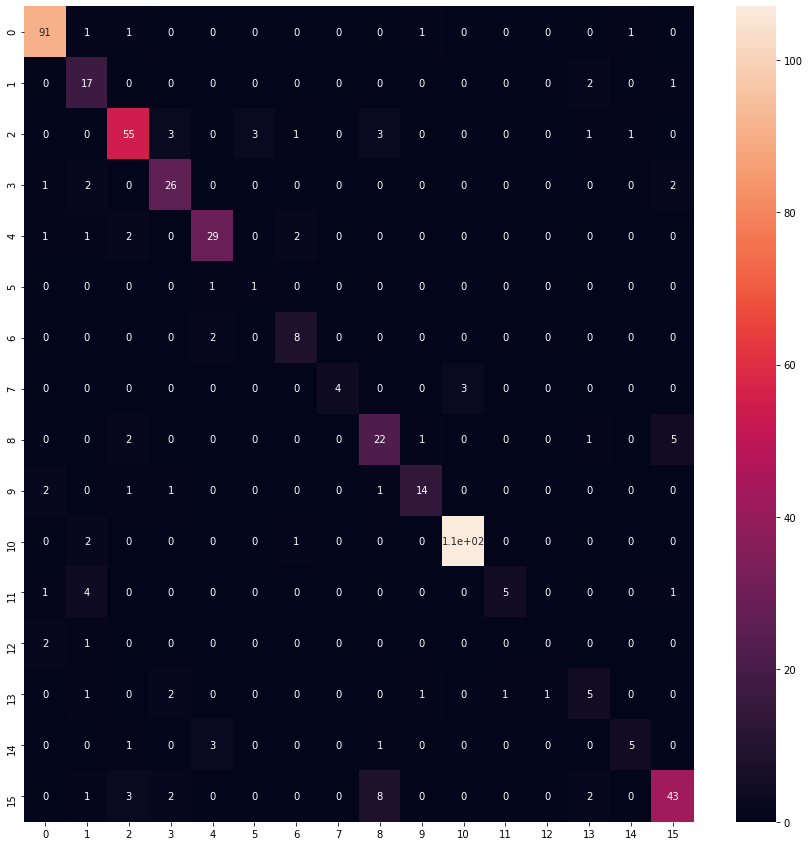

In [17]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True)

In [18]:
# This report shows the precision and recall of each value. 
# Precision - what proportion of positive identification were actually correct?
# Recall - what proportion of actual positives was identified correctly?

print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

            Baked Foods       0.93      0.96      0.94        95
      Beans and Lentils       0.57      0.85      0.68        20
              Beverages       0.85      0.82      0.83        67
      Breakfast Cereals       0.76      0.84      0.80        31
 Dairy and Egg Products       0.83      0.83      0.83        35
Dairy and Egg Products        0.25      0.50      0.33         2
          Fats and Oils       0.67      0.80      0.73        10
                   Fish       1.00      0.57      0.73         7
                 Fruits       0.63      0.71      0.67        31
       Grains and Pasta       0.82      0.74      0.78        19
                  Meats       0.97      0.97      0.97       110
         Nuts and Seeds       0.83      0.45      0.59        11
                 Snacks       0.00      0.00      0.00         3
       Spices and Herbs       0.45      0.45      0.45        11
                 Sweets 

In [43]:
# Boosted Trees Regression implementation 
# Initially attempting Bread Products
nutrition_bread = nutrition[nutrition['Food Group'] == 'Vegetables'] 
# pulling out the features data
nutrition_bread

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1065,Asparagus,Vegetables,2.00,250.0,0.800000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,9.0,0.0,710.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
1067,Cucumber,Vegetables,0.75,550.0,0.136364,Other Fruit,0.0610,0.0750,11.9,0.000438,...,11.0,0.0,23.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0
1068,Kale,Vegetables,0.62,180.0,0.344444,"Cruciferous Veg ( Cauliflower, broccili )",0.0452,0.0437,9.7,0.000686,...,0.0,0.0,6261.0,104.0,673.0,0.0,0.0,0.0,0.0,0.0
1069,Dried Shiitake Mushrooms,Vegetables,3.00,40.0,7.500000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,0.0,317.0,151.0,0.0,0.0,0.0,0.0,0.0
1071,Spinach,Vegetables,1.80,200.0,0.900000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,12198.0,10.0,165.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [44]:
X_bread = nutrition_bread.iloc[:, 11:].astype('float64').dropna() 
# pulling out the features data
X_bread

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1065,20.0,0.12,2.20,3.88,1.88,2.1,0.040,24.0,2.14,202.0,...,9.0,0.0,710.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
1067,15.0,0.11,0.65,3.63,1.67,0.5,0.037,16.0,0.28,147.0,...,11.0,0.0,23.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0
1068,35.0,1.49,2.92,4.42,0.99,4.1,0.178,254.0,1.60,348.0,...,0.0,0.0,6261.0,104.0,673.0,0.0,0.0,0.0,0.0,0.0
1069,296.0,0.99,9.58,75.37,2.21,11.5,0.225,11.0,1.72,1534.0,...,0.0,0.0,0.0,317.0,151.0,0.0,0.0,0.0,0.0,0.0
1071,23.0,0.39,2.86,3.63,0.42,2.2,0.063,99.0,2.71,558.0,...,0.0,0.0,12198.0,10.0,165.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241.0,10.16,1.66,40.60,19.10,2.9,1.507,4.0,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19.0,0.27,1.39,3.78,0.71,3.1,0.053,62.0,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96.0,6.84,5.23,4.32,1.89,1.2,1.486,70.0,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208.0,15.70,1.22,17.17,11.23,2.3,2.452,30.0,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [45]:
y_bread = nutrition_bread.iloc[:, 4:5].astype('float64').dropna()
# pulling out the price data
y_bread

,Price per Weight (£/100Gram)
1065,0.800000
1067,0.136364
1068,0.344444
1069,7.500000
1071,0.900000
...,...
1218,1.058824
1219,0.250000
1220,0.750000
1221,0.041000


In [46]:
y_bread = np.ravel(y_bread)
y_bread

array([0.8       , 0.13636364, 0.34444444, 7.5       , 0.9       ,
       0.11      , 0.1       , 0.28985507, 0.2       , 0.30769231,
       0.11711712, 0.4       , 0.18777778, 0.95238095, 0.46728972,
       0.73684211, 0.76744186, 1.        , 0.1       , 0.11463845,
       0.66666667, 0.4       , 0.26333333, 0.8       , 0.48888889,
       0.137     , 0.22      , 0.75      , 0.525     , 0.34444444,
       0.66666667, 0.18552876, 0.07166667, 0.475     , 0.91428571,
       0.33333333, 0.1       , 0.17916667, 0.16346154, 0.16666667,
       0.2       , 0.1       , 0.14285714, 0.34444444, 0.18777778,
       0.11834319, 0.48      , 1.66666667, 0.13333333, 0.13333333,
       0.68181818, 1.66666667, 0.28125   , 0.31363636, 0.20588235,
       0.05888889, 0.156     , 0.08256881, 0.08256881, 0.13333333,
       0.48      , 3.5       , 2.33333333, 0.22077922, 1.        ,
       0.76923077, 0.83333333, 0.084     , 0.88      , 0.06111111,
       0.1       , 0.046     , 0.1       , 0.21875   , 0.16705

In [47]:
from sklearn.model_selection import train_test_split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X_bread,y_bread,test_size=0.5)
# splitting the data into train and test data. 
#size =0.2 means 80% data is training data, 20% testing

In [48]:
# splitting the training data into validation and training data. 
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation,test_size=0.15)

In [49]:
# Implementing GradientBoostingRegressor here
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=75)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
# checking the outputs 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2922585464692321
Mean Squared Error: 0.2197967241561431
Root Mean Squared Error: 0.46882483312655604


In [56]:
np.mean(y_bread)
np.std(y_bread)

0.9045914546835161

In [52]:
Mean_Absolute_Error = []
Mean_Squared_Error = []
Root_Mean_Squared_Error = []

In [53]:
# creating a for loop to evaluate the hyperperameters of the model. Initally with n_estimators
#implementing the random forest here
for i in range (1, 200, 5):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    Mean_Absolute_Error.append(mae)
    Mean_Squared_Error.append(mse)
    Root_Mean_Squared_Error.append(rmse)
    
    

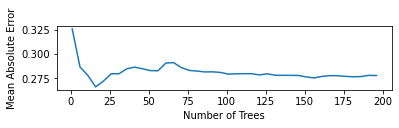

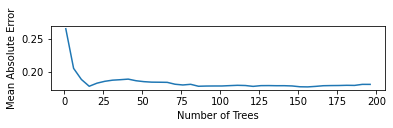

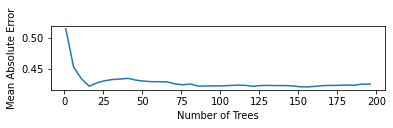

In [54]:
# plotting the different metrics to see the effect of changing the number of trees
import matplotlib.pyplot as plt
n_trees = list(range(1, 200, 5))

f = plt.figure(1)

plt.subplot(311)
plt.plot(n_trees, Mean_Absolute_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(312)
plt.plot(n_trees, Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(313)
plt.plot(n_trees, Root_Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
